In [1]:
'''

This code is used to find a case study of a large TPV


'''
%matplotlib inline

import cartopy.crs as ccrs
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from datetime import datetime
from netCDF4 import Dataset

import read_ecmwf_utils as reu
import read_TPV_utils as rtu
import spatial_utils as su
import plot_utils as pu
import spherical_plot_utils as spu
import save_utils as sau

In [2]:
import importlib
#importlib.reload(sau)
#importlib.reload(spu)
importlib.reload(su)

<module 'spatial_utils' from '/home/disk/sipn/rclancy/analysis/spherical/spatial_utils.py'>

In [3]:
# Load TPV data
all_TPVs_A = np.loadtxt('../all_TPVs_A_matched')
colnames_TPVs = open('../colnames_TPVs.ascii').read().split()

In [4]:
#Select just JJA TPVs north of 65N from 1999 to 2016
TPV_year = all_TPVs_A[:,0]
TPV_month = all_TPVs_A[:,1]

select_dates = np.isin(TPV_month, [6, 7, 8]) & np.isin(TPV_year, list(range(1999, 2017)))
all_TPVs_A = all_TPVs_A[select_dates,:]

TPV_latitude = all_TPVs_A[:,4]
all_TPVs_A = all_TPVs_A[TPV_latitude>65,:]

In [5]:
# Select TPV variables
TPV_year = all_TPVs_A[:,0]
TPV_month = all_TPVs_A[:,1]
TPV_day = all_TPVs_A[:,2]
TPV_hour = all_TPVs_A[:,3]
TPV_latitude = all_TPVs_A[:,4]
TPV_longitude = all_TPVs_A[:,5]
TPV_amplitude = all_TPVs_A[:,7]
TPV_recnum = all_TPVs_A[:,11]

In [6]:
# Get ecmwf SIC data
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/SIC/SIC.nc'
var_name = 'SIC'
var_date_name = var_name + '_dates'

# Read data
SIC, SIC_dates = reu.read_nc_var(nc_file, var_name, var_date_name)
# Get associated dates
SIC_year, SIC_month, SIC_day = reu.get_y_mo_d(SIC_dates)
# Get lat/lon coords
latitude_ecmwf, longitude_ecmwf, latmesh_ecmwf, lonmesh_ecmwf = reu.get_ecmwf_lat_lon(nc_file)
#Calculate variable anomalies
SIC_anom, SIC_anom_scaled = reu.calculate_clim_anoms(SIC, SIC_dates)

SIC :  (20, 240, 2079)
SIC_dates :  (3, 2079)
latitude_ecmwf:  (20,)
longitude_ecmwf:  (240,)


/home/disk/sipn/rclancy/analysis/spherical/read_ecmwf_utils.py:62: RuntimeWarning: Mean of empty slice
  var_daysav = np.nanmean(var_days,2)
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [21]:
# Get ecmwf PSL data
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/PSL/PSL.nc'
var_name = 'PSL'
var_date_name = var_name + '_dates'

# Read data
PSL, PSL_dates = reu.read_nc_var(nc_file, var_name, var_date_name)
# Get associated dates
PSL_year, PSL_month, PSL_day = reu.get_y_mo_d(PSL_dates)
# Get lat/lon coords
latitude_ecmwf, longitude_ecmwf, latmesh_ecmwf, lonmesh_ecmwf = reu.get_ecmwf_lat_lon(nc_file)
#Calculate variable anomalies
PSL_anom, PSL_anom_scaled = reu.calculate_clim_anoms(PSL, PSL_dates)

PSL :  (20, 240, 2054)
PSL_dates :  (3, 2054)
latitude_ecmwf:  (20,)
longitude_ecmwf:  (240,)


In [22]:
# Get ecmwf Z500 data
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
var_date_name = var_name + '_dates'

# Read data
Z500, Z500_dates = reu.read_nc_var(nc_file, var_name, var_date_name)
# Get associated dates
Z500_year, Z500_month, Z500_day = reu.get_y_mo_d(Z500_dates)
# Get lat/lon coords
latitude_ecmwf, longitude_ecmwf, latmesh_ecmwf, lonmesh_ecmwf = reu.get_ecmwf_lat_lon(nc_file)
#Calculate variable anomalies
Z500_anom, Z500_anom_scaled = reu.calculate_clim_anoms(Z500, Z500_dates)

Z500 :  (20, 240, 2034)
Z500_dates :  (3, 2034)
latitude_ecmwf:  (20,)
longitude_ecmwf:  (240,)


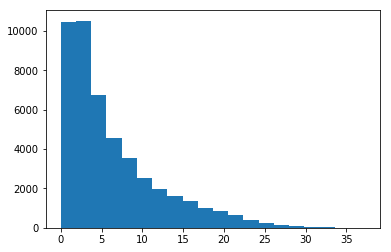

In [23]:
# Histogram of TPV amplitude
plt.hist(TPV_amplitude,20);

In [24]:
#When is biggest TPV?
ind = np.argmax(TPV_amplitude)-1
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude)
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude)+1
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_amplitude[ind])

#Where is biggest TPV?
ind = np.argmax(TPV_amplitude)-1
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude)
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude)+1
print(ind, TPV_latitude[ind], TPV_longitude[ind])

print()
print()

# ok, so need second biggest because that one's too early
ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) - 1
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)])
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 1
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 2
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 3
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 4
print(ind, TPV_year[ind], TPV_month[ind], TPV_day[ind], TPV_hour[ind], TPV_amplitude[ind])

#Where is biggest TPV?
ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) - 1
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)])
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 1
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 2
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 3
print(ind, TPV_latitude[ind], TPV_longitude[ind])

ind = np.argmax(TPV_amplitude[TPV_amplitude!=max(TPV_amplitude)]) + 4
print(ind, TPV_latitude[ind], TPV_longitude[ind])

11962 2003.0 7.0 28.0 13.43
11963 2003.0 7.0 29.0 37.31
11964 2003.0 7.0 29.0 34.95
11962 75.0 165.0
11963 74.5 172.5
11964 74.5 180.0


19400 2006.0 7.0 15.0 12.0 2.0
19401 2006.0 7.0 13.0 0.0 7.44
19402 2006.0 7.0 13.0 6.0 35.72
19403 2006.0 7.0 13.0 12.0 34.81
19404 2006.0 7.0 13.0 18.0 10.61
19405 2006.0 7.0 14.0 0.0 9.63
19400 68.0 258.5
19401 75.5 125.0
19402 76.0 135.0
19403 77.0 143.5
19404 76.5 147.5
19405 75.5 157.5


In [25]:
TPV_amplitude_temp = TPV_amplitude

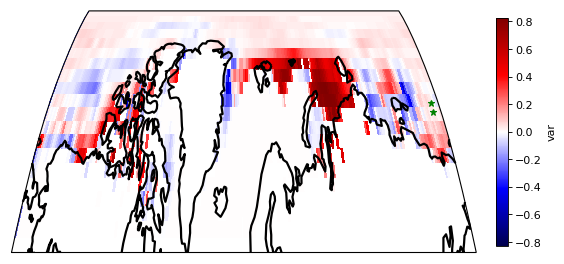

ValueError: too many values to unpack (expected 2)

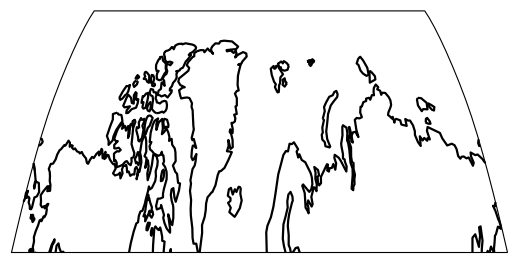

In [28]:
ind = np.argmax(TPV_amplitude_temp)

SIC_inds = (SIC_year==TPV_year[ind]) & (SIC_month==TPV_month[ind]) & (SIC_day==TPV_day[ind])
SIC_anom_case1 = np.squeeze(SIC_anom[:,:,SIC_inds])

PSL_inds = (PSL_year==TPV_year[ind]) & (PSL_month==TPV_month[ind]) & (PSL_day==TPV_day[ind])
PSL_anom_case1 = np.squeeze(PSL_anom[:,:,PSL_inds])

Z500_inds = (Z500_year==TPV_year[ind]) & (Z500_month==TPV_month[ind]) & (Z500_day==TPV_day[ind])
Z500_anom_case1 = np.squeeze(Z500_anom[:,:,Z500_inds])

fig=plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.set_aspect('auto')
ax.coastlines(linewidth=2)
plt.pcolormesh(lonmesh_ecmwf, latmesh_ecmwf, SIC_anom_case1, transform = ccrs.PlateCarree(),cmap='seismic')
plt.colorbar(fraction=0.023, pad=0.04, label = 'var')
A, B = plt.gci().get_clim()
cmax=np.abs(np.array([A, B])).max()
plt.clim(-cmax, cmax)
plt.plot(TPV_longitude[ind], TPV_latitude[ind], '*g', transform=ccrs.PlateCarree())
plt.plot(TPV_longitude[ind]+1, TPV_latitude[ind]+1, '*g', transform=ccrs.PlateCarree())
plt.show()

fig=plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.set_aspect('auto')
ax.coastlines(linewidth=2)
plt.pcolormesh(lonmesh_ecmwf, latmesh_ecmwf, PSL_anom_case1, transform = ccrs.PlateCarree(),cmap='seismic')
plt.colorbar(fraction=0.023, pad=0.04, label = 'var')
A, B = plt.gci().get_clim()
cmax=np.abs(np.array([A, B])).max()
plt.clim(-cmax, cmax)
plt.plot(TPV_longitude[ind], TPV_latitude[ind], '*g', transform=ccrs.PlateCarree())
plt.plot(TPV_longitude[ind]+1, TPV_latitude[ind]+1, '*g', transform=ccrs.PlateCarree())
plt.show()

fig=plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.set_aspect('auto')
ax.coastlines(linewidth=2)
plt.pcolormesh(lonmesh_ecmwf, latmesh_ecmwf, Z500_anom_case1, transform = ccrs.PlateCarree(),cmap='seismic')
plt.colorbar(fraction=0.023, pad=0.04, label = 'var')
A, B = plt.gci().get_clim()
cmax=np.abs(np.array([A, B])).max()
plt.clim(-cmax, cmax)
plt.plot(TPV_longitude[ind], TPV_latitude[ind], '*g', transform=ccrs.PlateCarree())
plt.plot(TPV_longitude[ind]+1, TPV_latitude[ind]+1, '*g', transform=ccrs.PlateCarree())
plt.show()


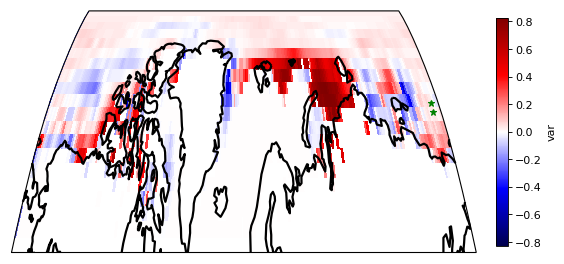

In [165]:
TPV_amplitude_temp[TPV_amplitude_temp==max(TPV_amplitude_temp)]=0

ind = np.argmax(TPV_amplitude_temp)
TPV_inds = (SIC_year==TPV_year[ind]) & (SIC_month==TPV_month[ind]) & (SIC_day==TPV_day[ind])
SIC_anom_case1 = np.squeeze(SIC_anom[:,:,TPV_inds])

fig=plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.set_aspect('auto')
ax.coastlines(linewidth=2)
plt.pcolormesh(lonmesh_ecmwf, latmesh_ecmwf, SIC_anom_case1, transform = ccrs.PlateCarree(),cmap='seismic')
plt.colorbar(fraction=0.023, pad=0.04, label = 'var')
A, B = plt.gci().get_clim()
cmax=np.abs(np.array([A, B])).max()
plt.clim(-cmax, cmax)
plt.plot(TPV_longitude[ind], TPV_latitude[ind], '*g', transform=ccrs.PlateCarree())
plt.plot(TPV_longitude[ind]+1, TPV_latitude[ind]+1, '*g', transform=ccrs.PlateCarree())
plt.show()


In [182]:
TPV_amplitude_temp[TPV_amplitude_temp==np.max(TPV_amplitude_temp)]=0

ind = np.argmax(TPV_amplitude_temp)
print(ind)

11963


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [179]:
TPV_amplitude_temp==max(TPV_amplitude_temp)

(array([39029]),)

In [187]:
PSL_anom_case1.shape

(20, 240, 0)

In [27]:
PSL_anom_case1.shape

(20, 240, 0)

In [ ]:
colna